### Principal Component Analysis: PCA is one of the oldest and most widely used technique to reduce the dimensionallity of a dataset, while preserving as much "variability" (i.e. statistical information) as possible.

In [1]:
# Import Functions to read and show images:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Loading MNIST Data:
d0 = pd.read_csv("digit_recognizer.csv")
d0.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# save the labels into a variable l:
l = d0["label"]

In [4]:
# Dropping the label features from d0 and store the pixel data in d.
d = d0.drop("label",axis=1)

In [5]:
# print shape of pixel and label data
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


In [6]:
idx=0
# print label value for above index
print(l[idx])

1


# Display or plot above label

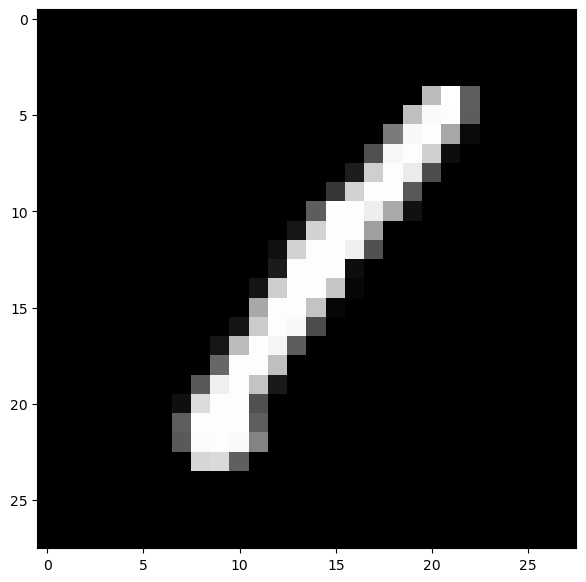

In [7]:
# Now we are trying the visualize the digit from the csv what it actually denotes
plt.figure(figsize=(7,7))

# reshape from 1D to 2D pixel array (prefer 28 X 28); as 784=28X28
grid_data = d.loc[idx].values.reshape(28,28)

# plot above grid image with cmap as gray and interpolation as none
plt.imshow(grid_data,interpolation="none",cmap="gray")

# displaying the plot
plt.show()

# 2D Visualization using PCA

In [8]:
print("The shape of the sample data= ",d.shape)
print("The shape of the sample data= ",l.shape)

The shape of the sample data=  (42000, 784)
The shape of the sample data=  (42000,)


# Data-Preprocessing: Standardization the data

In [9]:
sc = StandardScaler()
sc_data = sc.fit_transform(d)
print(sc_data.shape)

(42000, 784)


# Method 1: Performing PCA Manually

# find the co-variance matrix which is: A^T* A

Find the covariance matrix of the dataset by multiplying the the matrix of features by its transpose. It is a measure of how much each of the dimensions vary from the mean with respect to each other.

The covariance is measured between 2 dimensions to see if there is a relationship between the 2 dimensions, e.g. relationship between the height and weight of students.

A positive value of covariance indicates that both the dimensions are directly proportional to each other, where if one dimension increases the other dimension
increases accordingly.

A negative value of covariance indicates that both the dimensions are indirectly proportional to each other, where if one dimension increases then other dimension decreases accordingly.

If in case the covariance is zero, then the two dimensions are independent of each other.

In [10]:
sample_data = sc_data

# use matrix_multiplication using numpy to find covariance matrix
covar_matrix = np.matmul(sample_data.T, sample_data)  #np.matmul ==> Under Numpy comes Matrix Multiplication

# printing shape of covar_matrix
print("The shape of variance matrix = ",covar_matrix.shape)

The shape of variance matrix =  (784, 784)


# Comuting Eigenvectors and Eigenvalues

In [11]:
# finding the top three eigen-values and corresponding eigen-vectors for projecting onto a 2-Dimensional space
from scipy.linalg import eigh

# the parameter "eigvals" is defined (low value to high value)
# eigh function will return the eigen values in ascending order.
# the code will generate only top 2 (782 and 783) eigen values.
values,vectors = eigh(covar_matrix,eigvals=(782,783))

print("Shape of eigen vectors: ",vectors.shape)

# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

print("Updated shape of eigen vectors:",vectors.shape)
#here the vectors [1] represent the eigen vector corresponding 1st principal eigen vector
#here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors:  (784, 2)
Updated shape of eigen vectors: (2, 784)


In [12]:
# projecting the original data sample on the plane formed by multiplication of two principal eigen vectors with transposed sample_data

# multiplication of two principal eigen vectors with transposed sample data to get 2d projected data new_coordinates = np.matmul (vectors, sample_data.T)
new_coordinates = np.matmul(vectors,sample_data.T)

print ("resultanat new data points shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

resultanat new data points shape  (2, 784) X (784, 42000)  =  (2, 42000)


In [13]:
# appending label to the 2d projected data 
new_coordinates = np.vstack((new_coordinates,l)).T

# creating a new data frame for ploting the labeled points
dataframe = pd.DataFrame(data=new_coordinates, columns=("PCA1","PCA2","label")) 
print(dataframe.head())

       PCA1       PCA2  label
0 -5.226445  -5.140478    1.0
1  6.032996  19.292332    0.0
2 -1.705813  -7.644503    1.0
3  5.836139  -0.474207    4.0
4  6.024818  26.559574    0.0


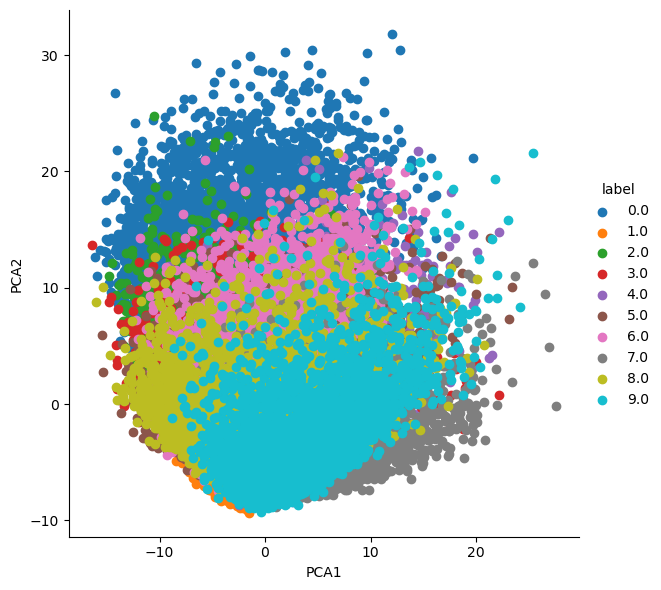

In [14]:
# ploting the 2d data points with seaborn 
sns.FacetGrid(dataframe,hue="label",size=6).map(plt.scatter,"PCA1","PCA2").add_legend() 
plt.show()

# Method 2: PCA using Scikit-Learn

# Configuring the parameters

In [15]:
# initialization of the PCA
pca = PCA()

shape of pca_reduced.shape  (42000, 2)


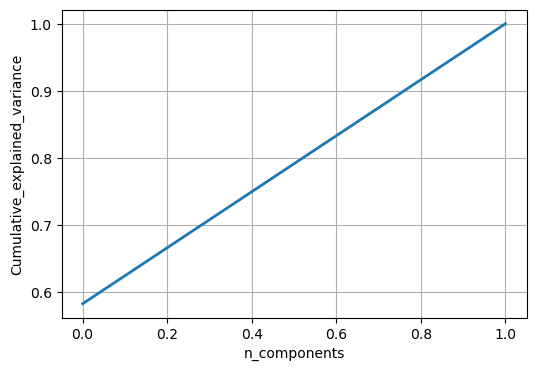

In [16]:
# the number of components = 2 
pca.n_components = 2

# fit transform sample data using pca 
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data 
print("shape of pca_reduced.shape ", pca_data.shape)

#calculating percentage of variance explained in the data 
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

#cumulative sum of the percentage_var_explained 
cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum 
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel("Cumulative_explained_variance")
plt.show()

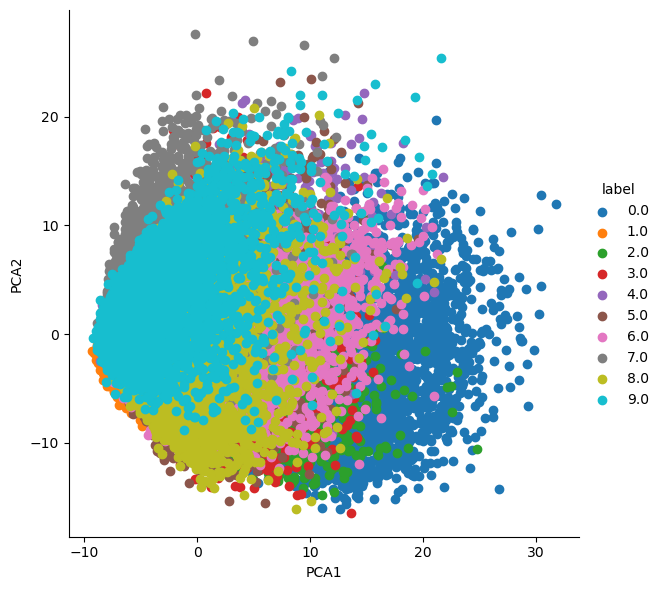

In [17]:
# attaching the label for each 2-d data point (Hint: Use np.vstack)
pca_data= np.vstack((pca_data.T,l)).T

# creating a new data from which help us in ploting the result data 
pca_df = pd.DataFrame(data=pca_data,columns=("PCA1","PCA2","label")) 
sns.FacetGrid(pca_df, hue="label",size=6).map(plt.scatter,"PCA1","PCA2").add_legend()
plt.show()                                               

# PCA for Dimensionality Reduction (not for visualization)

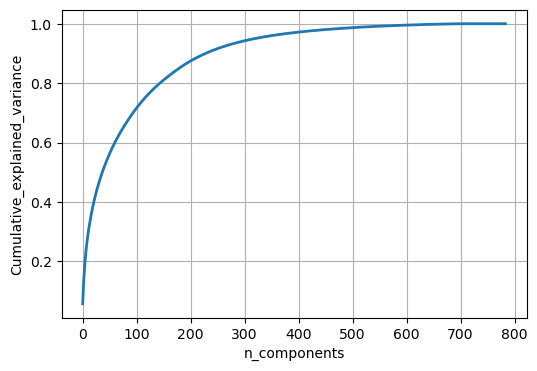

In [18]:
# the number of components = 784
pca.n_components = 784 

# fit transform sample data using pca 
pca_data = pca.fit_transform(sample_data)

#calculating percentage of variance explained in the data 
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

#cumulative sum of the percentage_var_explained 
cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum 
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel("Cumulative_explained_variance")
plt.show()

# PCA is a method that brings together:
1. A measure of how each variable is associated with one another. (Covariance matrix.)
2. The directions in which our data are dispersed. (Eigenvectors.)
3. The relative importance of these different directions. (Eigenvalues.)
4. PCA combines our predictors and allows us to drop the Eigenvectors that are relatively unimportant.

# Summary:
1. PCA helps you interpret your data, but it will not always find the important patterns.
2. Principal component analysis (PCA) simplifies the complexity in high-dimensional data while retaining trends and patterns.
3. It does this by transforming the data into fewer dimensions, which act as summaries of features.

# Conculsion:
1. Principal Component Analysis (PCA) is a popular and powerful tool in data science.
2. It provides a way to reduce redundancy in a set of variables. We've seen that this equivalent to an eigenvector decomposition of the data's covariance matrix.
3. Applications for PCA include: dimensionality reduction, clustering, and outlier detection.